[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ArturGogiyan/NLP_research/blob/master/NaiveBayesClassifier.ipynb)

# Configure environment

Following section required only if you're running this code in google collab, so if you need uncomment it and run

In [4]:
# !git clone https://github.com/ArturGogiyan/NLP_research.git
# %cd NLP_research
# !pip install -r './requirements.txt'

# Dataset loading

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from common import utils

!pip install 'dvc[gdrive]'

You should consider upgrading via the '/home/basicec/PycharmProjects/NLP_research2/venv/bin/python -m pip install --upgrade pip' command.


In [12]:
df = utils.read_remote_dataset()

print("Shape of data=>", df.shape)

Shape of data=> (5000, 17)


# Non-neural network processing

## Preparations

Resources needed:

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np

from common import bagofwords

### Import Common

## Naive Bayes Classifier

In [8]:
def bayes_test(class_name, test_percentage):
    print("\'" + class_name + "\' MODEL:")
    texts_train, texts_test, y_train, y_test = utils.get_train_and_test(df, class_name, test_percentage)
    if len(texts_train) == 0:
        print("Class entities amount is too small! Ignoring...")
        return [], [], []

    bow = bagofwords.BagOfWords(texts_train)
    X_train_bow = np.stack(list(map(bow.text_to_bow, texts_train)))
    X_test_bow = np.stack(list(map(bow.text_to_bow, texts_test)))
    naive_model = GaussianNB().fit(X_train_bow, y_train)

    ret = naive_model.predict(X_test_bow)
    test_accuracy = np.mean(ret == y_test)
    print(f"Model accuracy: {test_accuracy:.3f}")
    metrics.plot_roc_curve(naive_model, X_test_bow, y_test)

    return texts_test, ret, y_test

In [9]:
def make_bayes_models(test_percentage):
    classes = (list(df.columns.values))
    classes.pop(0)
    i = 1
    bayes_result = []
    bayes_df = pd.DataFrame()

    for c in classes:
        try:
            test_text, predicted_y, correct_y = bayes_test(c, test_percentage)
            if len(test_text) > 0:
                i += 1
                if len(bayes_result) == 0:
                    bayes_result.append(test_text)
                    bayes_df["Data"] = test_text
                correct_incorrect = []
                for y_ind in range(len(predicted_y)):
                    if predicted_y[y_ind] == correct_y[y_ind]:
                        correct_incorrect.append("+")
                    else:
                        correct_incorrect.append("-")
                bayes_result.append(correct_incorrect)
                bayes_df[c] = correct_incorrect

        except Exception as e:
            print(c + " error!")
            print(e)

    return bayes_df

'comment' MODEL:
comment error!
unsupported operand type(s) for +=: 'int' and 'str'
'account-management.fingerprint-facial-recognition' MODEL:
Model accuracy: 0.861
'staff-support.email' MODEL:
Model accuracy: 0.989
'company-brand.general-satisfaction' MODEL:
Model accuracy: 0.873
'attributes.size-fit' MODEL:
Model accuracy: 1.000
'attributes.taste-flavour' MODEL:
Model accuracy: 1.000
'attributes.cleanliness' MODEL:
Model accuracy: 1.000
'company-brand.convenience' MODEL:
Model accuracy: 0.772
'staff-support.agent-named' MODEL:
Model accuracy: 0.990
'purchase-booking-experience.choice-variety' MODEL:
Model accuracy: 0.999
'logistics-rides.speed' MODEL:
Model accuracy: 0.999
'logistics-rides.order-accuracy' MODEL:
Model accuracy: 1.000
'account-management.account-access' MODEL:
Model accuracy: 0.682
'online-experience.updates-versions' MODEL:
Model accuracy: 0.766
'company-brand.competitor' MODEL:
Model accuracy: 0.759
'online-experience.language' MODEL:
Model accuracy: 0.999


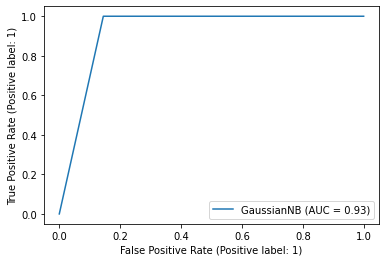

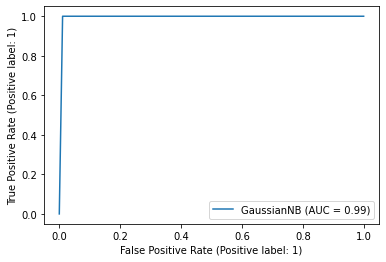

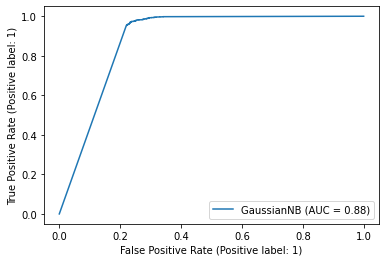

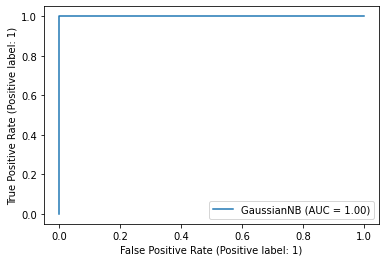

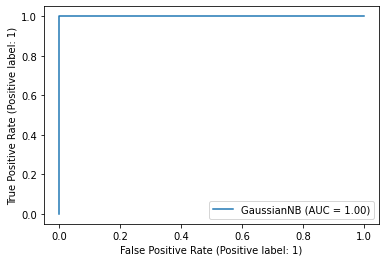

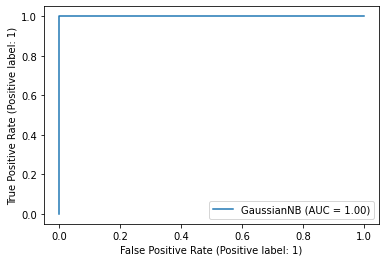

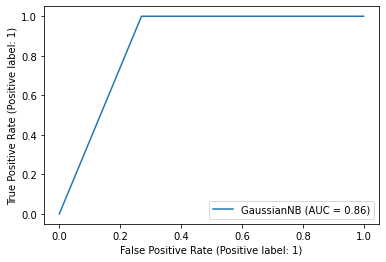

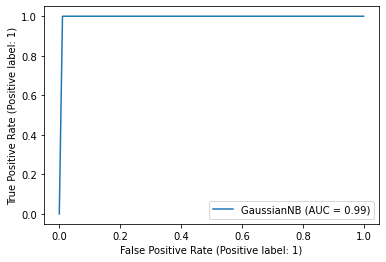

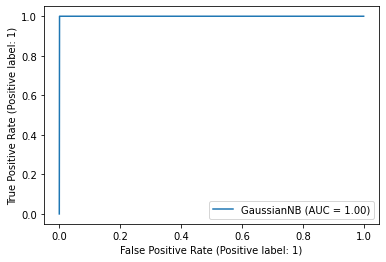

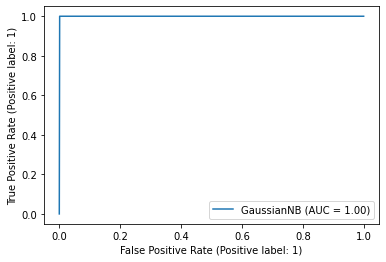

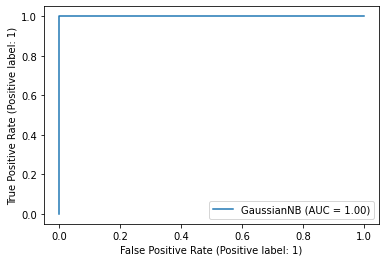

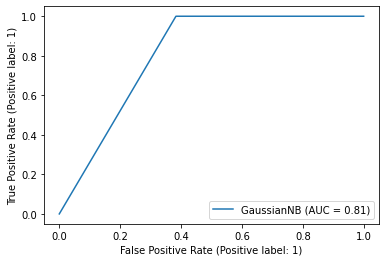

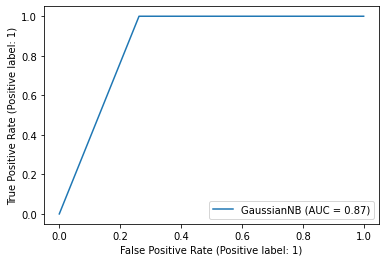

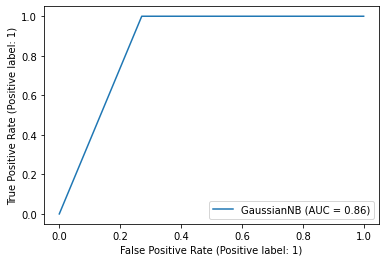

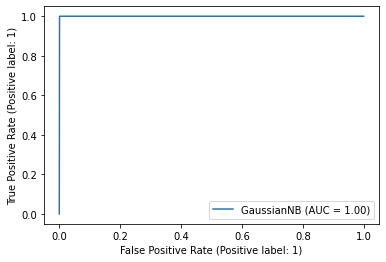

Overall efficiency:0.56


In [10]:
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
bayes_df = make_bayes_models(50)
bayes_classes = (list(bayes_df.columns.values))
total_sz = 0.0
correct_sz = 0.0

for ind in bayes_df.index:

    total_sz += 1
    correct = True
    for c in bayes_classes:
        if bayes_df[c][ind] == '-':
            correct = False
            break
    if correct:
        correct_sz += 1

plt.show()
print("Overall efficiency:" + "{:.2f}".format(correct_sz / total_sz))